## Open API(Rest API)란?
 - **API:** Application Programming Interface의 약자로, 특정 프로그램을 만들기 위해 제공되는 모듈(함수 등)을 의미
 - **Open API:** 공개 API라고도 불리우며, 누구나 사용할 수 있도록 공개된 API (주로 Rest API 기술을 많이 사용함)
 - **Rest API:** Representational State Transfer API의 약자로, HTTP프로토콜을 통해 서버 제공 기능을 사용할 수 있는 함수를 의미
   - 일반적으로 XML, JSON의 형태로 응답을 전달(원하는 데이터 추출이 수월)

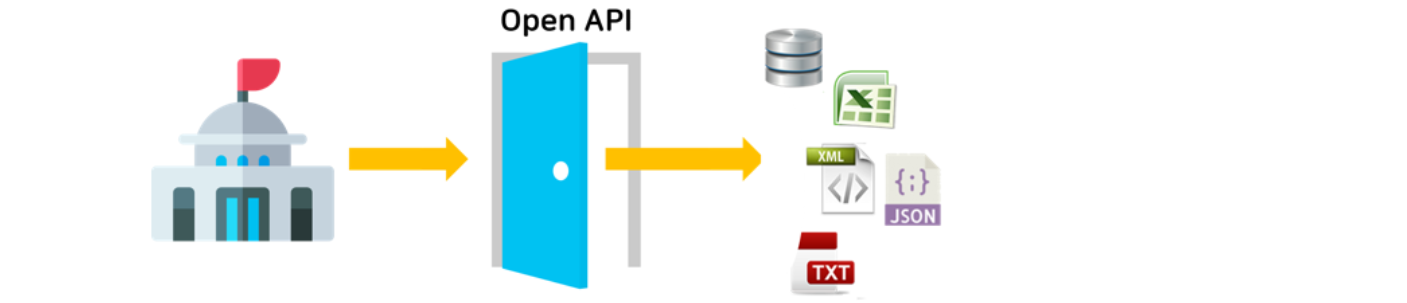

## 네이버 OpenAPI 사용하기

### 네이버 개발자 센터/ 데이터랩에 접속

https://developers.naver.com/products/service-api/datalab/datalab.md

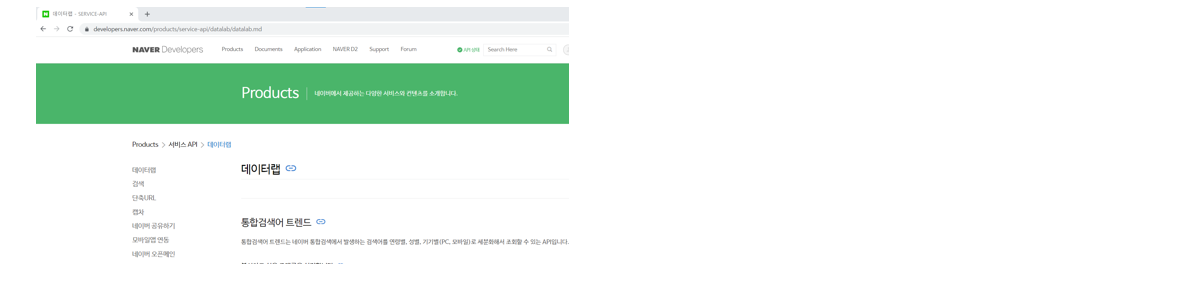

### 오픈API 이용 신청

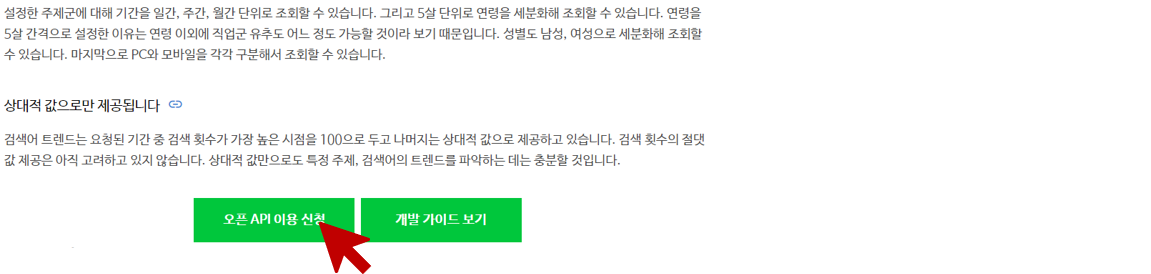

### 어플리케이션 등록(API 이용 신청)

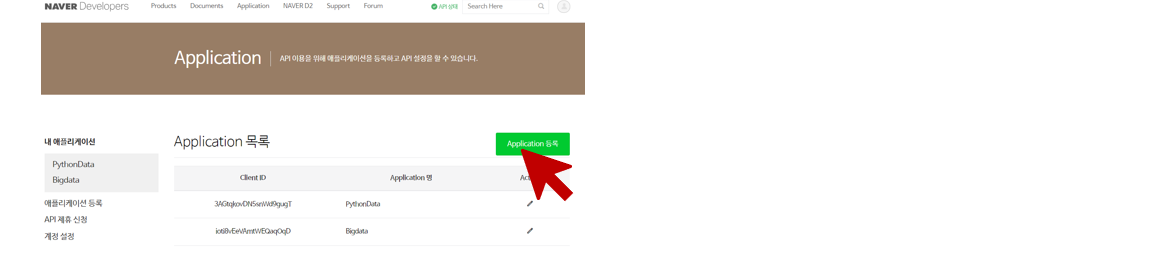

### 어플리케이션 등록 작성

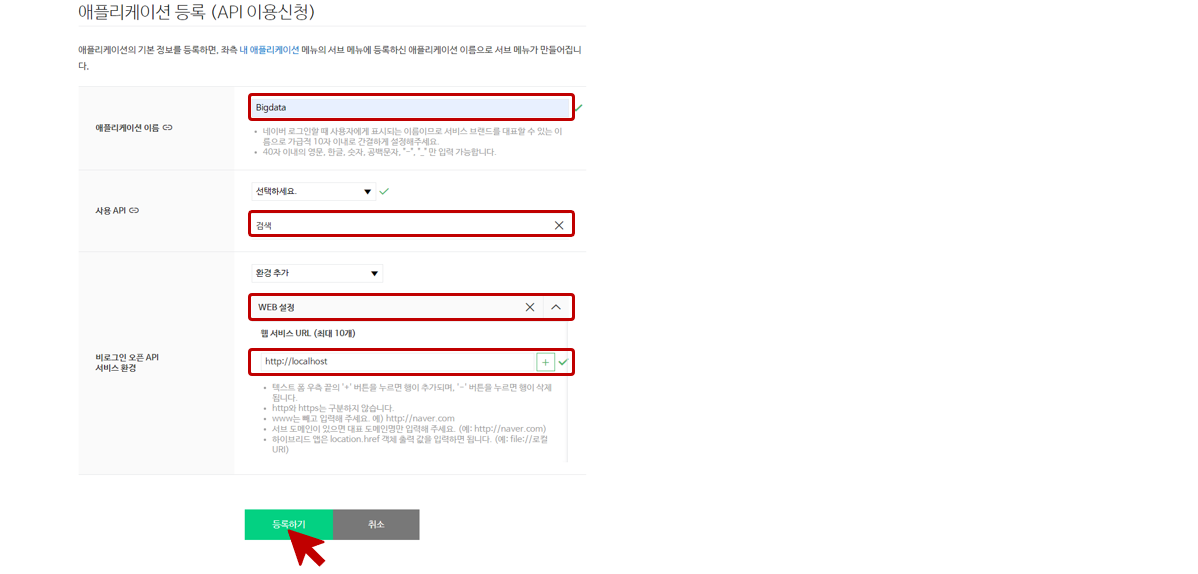

### 어플리케션 정보 확인


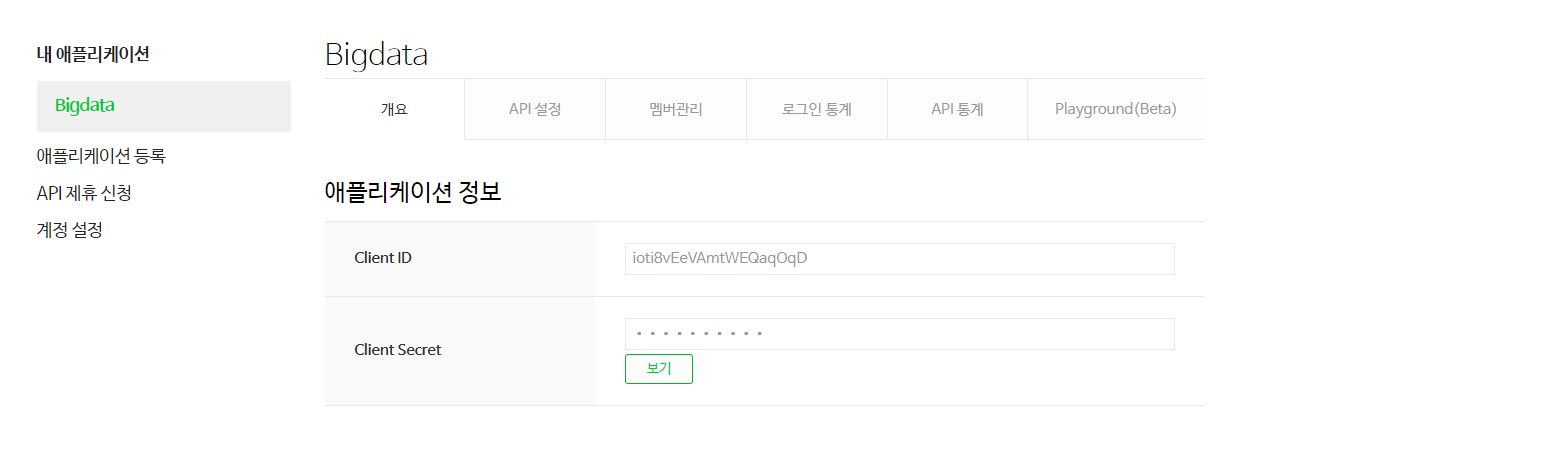

## 네이버 API 사용하기

* 아래의 패턴코드를 사용한다. 
* 변경부분
    * client_id, client_secret: 네이버 OpenAPI에서 부여 받은 아이디와 인증기
    * 검색어
    * naver_open_api: 쇼핑, 뉴스, 블로그 등에 따라 달라짐. 네이버에서 복사해서 사용함.
        * 쇼핑:'https://openapi.naver.com/v1/search/shop.json'
        * 뉴스:'https://openapi.naver.com/v1/search/news.json'
        * 블로그:'https://openapi.naver.com/v1/search/blog.json'

    * 요청 변수: 필수 변수는 반드시 포함되어야 함
        * {변수이름:변수값} 형태로 설정   
    * 데이터 추출
        * data['키'] 형태로 데이터 추출

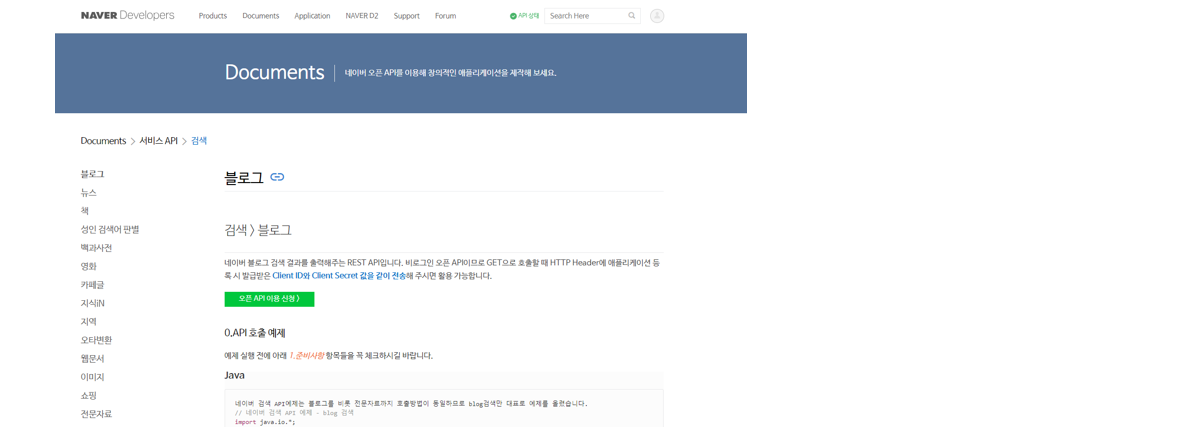

### 쇼핑 API-JSON

In [ ]:
import requests
import pprint # JSON 출력 이쁘게

# 네이버에서 받은 아이디와 패스워드 할당
client_id = '<YOUR_CLIENT_ID>'
client_secret = '<YOUR_CLIENT_SECRET>'

#네이버 쇼핑 api
naver_open_api = 'https://openapi.naver.com/v1/search/shop.json'

#검색어
query = '갤럭시 s25'

#요청 변수
params = {'query':query}

# 패턴 코드
# HTTP 규약이 있고, 그 중 Header 영역에 네이버 id/pwd 정보를 추가하여 URL 요청
header_params = {"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret}

# 상품검색 URL을 네이버에 요청하고 응답받음
res = requests.get(naver_open_api, headers=header_params, params=params)

# 요청한 URL 확인
print(res.url)

if res.status_code != 200:
    print ("Error Code:", res.status_code)       
else:
    
    # 검색 결과
    data = res.json()

    # 결과 출력
    pprint.pprint(data)


https://openapi.naver.com/v1/search/shop.json?query=%EA%B0%A4%EB%9F%AD%EC%8B%9C+s25
{'display': 10,
 'items': [{'brand': '갤럭시',
            'category1': '디지털/가전',
            'category2': '휴대폰',
            'category3': '자급제폰',
            'category4': '',
            'hprice': '',
            'image': 'https://shopping-phinf.pstatic.net/main_5262874/52628743821.20250131110947.jpg',
            'link': 'https://search.shopping.naver.com/catalog/52628743821',
            'lprice': '1086000',
            'maker': '삼성전자',
            'mallName': '네이버',
            'productId': '52628743821',
            'productType': '1',
            'title': '삼성전자 <b>갤럭시 S25</b> 5G 256GB [자급제]'},
           {'brand': '갤럭시',
            'category1': '디지털/가전',
            'category2': '휴대폰',
            'category3': '자급제폰',
            'category4': '',
            'hprice': '',
            'image': 'https://shopping-phinf.pstatic.net/main_5262875/52628756978.20250131132722.jpg',
            'link': 'https

> * 내가 요청한 URL 구조 살펴보기
> * 내가 받은 response 구조 살펴보기

In [34]:
#제일 첫 상품 추출해서 보기
data['items'][0]

{'title': '삼성전자 <b>갤럭시 S25</b> 5G 256GB [자급제]',
 'link': 'https://search.shopping.naver.com/catalog/52628743821',
 'image': 'https://shopping-phinf.pstatic.net/main_5262874/52628743821.20250131110947.jpg',
 'lprice': '1086000',
 'hprice': '',
 'mallName': '네이버',
 'productId': '52628743821',
 'productType': '1',
 'brand': '갤럭시',
 'maker': '삼성전자',
 'category1': '디지털/가전',
 'category2': '휴대폰',
 'category3': '자급제폰',
 'category4': ''}

In [ ]:
# 상품 link 추출
data['items'][0]['link']

'https://search.shopping.naver.com/catalog/52628743821'

In [ ]:
# 상품 타이틀 출력
import re

nums = data['display'] # 상품 개수

for num in range(nums):
    title = re.sub('[<b></b>]','',data['items'][num]['title']) # 불필요한 문자 제거
    print(f"{num} {title}")

0 삼성전자 갤럭시 S25 5G 256GB [자급제]
1 삼성전자 갤럭시 S25 울트라 5G 256GB [자급제]
2 삼성전자 갤럭시 S25 울트라 5G 512GB [자급제]
3 삼성전자 갤럭시 S25 플러스 5G 256GB [자급제]
4 삼성전자 갤럭시 S25 5G 512GB [자급제]
5 삼성전자 갤럭시 S25 플러스 5G 512GB [자급제]
6 삼성전자 갤럭시 S25 울트라 5G 1TB [자급제]
7 삼성전자 갤럭시 S25 울트라 5G 512GB [자급제]
8 삼성전자 갤럭시 S25 5G 256GB [자급제]
9 삼성전자 갤럭시 S25 5G 512GB [자급제]


### 쇼핑 API-XML

In [ ]:
import requests

# 네이버에서 받은 아이디와 패스워드 할당
client_id = '<YOUR_CLIENT_ID>'
client_secret = '<YOUR_CLIENT_SECRET>'

#네이버 뉴스 api
naver_open_api = 'https://openapi.naver.com/v1/search/shop.xml'

#검색어
query = '갤럭시 s25'

#요청 변수
params = {'query':query}

# 패턴 코드
# HTTP 규약이 있고, 그 중 Header 영역에 네이버 id/pwd 정보를 추가하여 URL 요청
header_params = {"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret}

res = requests.get(naver_open_api, headers=header_params, params=params)

if res.status_code != 200:
    print ("Error Code:", res.status_code)
        
else:
    # 검색 결과
    print(res.text)

<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - shop ::&apos;갤럭시 s25&apos;</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Tue, 18 Feb 2025 01:24:20 +0900</lastBuildDate><total>432355</total><start>1</start><display>10</display><item><title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 5G 256GB [자급제]</title><link>https://search.shopping.naver.com/catalog/52628743821</link><image>https://shopping-phinf.pstatic.net/main_5262874/52628743821.20250131110947.jpg</image><lprice>1086000</lprice><hprice></hprice><mallName>네이버</mallName><productId>52628743821</productId><productType>1</productType><brand>갤럭시</brand><maker>삼성전자</maker><category1>디지털/가전</category1><category2>휴대폰</category2><category3>자급제폰</category3><category4></category4></item><item><title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 울트라 5G 256GB [자급제]</title><link>https://search.shopping.naver.com/catalog/52628756978</link><image>https://shopping-phinf.psta

!pip install beautifulsoup4
!pip install lxml

In [71]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(res.content, "html.parser")

/tmp/ipykernel_5679/25951287.py:2: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup=BeautifulSoup(res.content, "html.parser")


In [72]:
soup.find_all('title')

[<title>Naver Open API - shop ::'갤럭시 s25'</title>,
 <title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 5G 256GB [자급제]</title>,
 <title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 울트라 5G 256GB [자급제]</title>,
 <title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 울트라 5G 512GB [자급제]</title>,
 <title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 플러스 5G 256GB [자급제]</title>,
 <title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 5G 512GB [자급제]</title>,
 <title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 플러스 5G 512GB [자급제]</title>,
 <title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 울트라 5G 1TB [자급제]</title>,
 <title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 울트라 5G 512GB [자급제]</title>,
 <title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 5G 256GB [자급제]</title>,
 <title>삼성전자 &lt;b&gt;갤럭시 S25&lt;/b&gt; 5G 512GB [자급제]</title>]

> * json, xml 형태 중 한가지만 선택해서 사용하면 됨.
> * json 추천

### 요청 변수 추가 ( 네이버 쇼핑의 경우)

* 요청 변수 종류는 메뉴얼을 참고할 것!!!
* 검색 결과 건수 기본 10건에서 100건으로 설정 
    * display=100 으로 설정
* 정렬: 유사도
    * sort=sim

In [ ]:
import re
import requests
import pprint # JSON 출력 이쁘게

# 네이버에서 받은 아이디와 패스워드 할당
client_id = '<YOUR_CLIENT_ID>'
client_secret = '<YOUR_CLIENT_SECRET>'

#검색어
query = '갤럭시S25'

#네이버 쇼핑 URL
naver_open_api = 'https://openapi.naver.com/v1/search/shop.json'

#######################################################################
#요청 변수 (검색건수: 100건, 정렬방식: 유사한것 중심)
params = {'query':query}



#######################################################################

# 패턴 코드
# HTTP 규약이 있고, 그 중 Header 영역에 네이버 id/pwd 정보를 추가하여 URL 요청
header_params = {"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret}
res = requests.get(naver_open_api, headers=header_params, params=params)

if res.status_code == 200:
    
    # 검색 결과
    data = res.json()
    
    # 결과 출력
#     pprint.pprint(data)
    
    # 데이터 추출
    for index, item in enumerate(data['items']):
        title = re.sub(r'[<b></b>]','', item['title'])  # 불필요한 문자 제거
        print (index + 1, title, item['link'])
        
else:
    print ("Error Code:", res.status_code)


1 삼성전자 갤럭시 S25 5G 256GB [자급제] https://search.shopping.naver.com/catalog/52628743821
2 삼성전자 갤럭시 S25 울트라 5G 256GB [자급제] https://search.shopping.naver.com/catalog/52628756978
3 삼성전자 갤럭시 S25 울트라 5G 512GB [자급제] https://search.shopping.naver.com/catalog/52628834304
4 삼성전자 갤럭시 S25 플러스 5G 256GB [자급제] https://search.shopping.naver.com/catalog/52628744098
5 삼성전자 갤럭시 S25 5G 512GB [자급제] https://search.shopping.naver.com/catalog/52628743954
6 삼성전자 갤럭시 S25 플러스 5G 512GB [자급제] https://search.shopping.naver.com/catalog/52628744198
7 삼성전자 갤럭시 S25 울트라 5G 1TB [자급제] https://search.shopping.naver.com/catalog/52628835217
8 삼성전자 갤럭시 S25 울트라 5G 512GB [자급제] https://search.shopping.naver.com/catalog/52628834303
9 삼성전자 갤럭시 S25 5G 256GB [자급제] https://search.shopping.naver.com/catalog/52628743819
10 삼성전자 갤럭시 S25 5G 512GB [자급제] https://search.shopping.naver.com/catalog/52628743955


- [참고: 네이버 Open API HTTP 응답 상태 에러 코드 목록1](https://developers.naver.com/docs/common/openapiguide/#/errorcode.md)
- [참고: 일반적인 HTTP 응답 상태 코드](http://ooz.co.kr/260) 